<a href="https://colab.research.google.com/github/Mjcherono/hotel_reservation_cancellation_classification/blob/main/Copy_of_Foxtrot_random_forest_Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW



Algarve resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels wish to find out the most popular time of year that hotel rooms are booked, so they can adequately plan themselves in terms of supplies and staffing. This will ensure that they are able to cater to their guests more efficiently.





# IMPORTING LIBRARIES

In [ ]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATASET 

In [ ]:
# Loading the datasets
names = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotel_df = pd.read_csv('hotel_bookings.csv', usecols=names)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# CHECKING THE DATA

In [ ]:
# Determing the number of records in our dataset
hotel_df.shape

(119390, 32)

In [ ]:
# Previewing the first records of our dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Previewing the last records of our dataset
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#consice summary of train dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**observation**: our datset has 119390 observations and 32 variables, it has 4 floats, 16int and 12 object datatype.

In [ ]:
# checking the target variable
hotel_df.is_canceled.value_counts() 

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#getting the above in parcentage
#
hotel_df.is_canceled.value_counts() / len(hotel_df) * 100 

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

Tidying the data




In [ ]:
#creating a copy of the dataset to be be used on cleaning process
hotel_df1=hotel_df.copy()
#
#getting the irrelevant varaibles
columns = ['arrival_date_year','agent','arrival_date_week_number','lead_time', 'market_segment', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
#
#dropping the irrelevant colunms
drop_colunms= hotel_df1.drop(columns, axis = 1, inplace=True)
#
#previewing the dataset
hotel_df1.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
1,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
2,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,Transient,0,0,Check-Out
3,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,0,Check-Out
4,Resort Hotel,0,July,1,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,1,Check-Out


In [ ]:
# Check for missing values
#
hotel_df1.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
deposit_type                           0
company                           112593
customer_type                          0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
dtype: int64

In [ ]:
#getting the percentage of missing data in each column
#
hotel_df1.isnull().sum()/len(hotel_df1)* 100 



hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
company                           94.306893
customer_type                      0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
dtype: float64

In [ ]:
# as a role of thumb, drop any colunm with more than 25% of the missing data.
#
hotel_df1 = hotel_df1[hotel_df1.columns[hotel_df1.isnull().mean() < 0.25]]
hotel_df1.shape

(119390, 21)

In [ ]:
hotel_df1.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
dtype: int64

**observation**: the data type are appropriate now and there is a clue that we have null values.

In [ ]:
#filling the missing values of children variable with the mean
#
hotel_df1['children']= hotel_df1['children'].fillna(hotel_df1['children'].mean(), axis = 0)

In [ ]:
#filling the missing values in the country variable with mode
#
hotel_df1.fillna({'country': hotel_df1['country'].mode()[0]}, inplace=True)

In [ ]:
hotel_df1.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
#confriming no missing values.
#
hotel_df1.isnull().sum().any()

False

In [ ]:
# Checking if there are duplicates
#
hotel_df1.duplicated().sum()

38125

In [ ]:
# Dropping duplicates
hotel_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
hotel_df1.duplicated().any()

False

In [ ]:
#To remove white spaces in our columns
hotel_df1.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

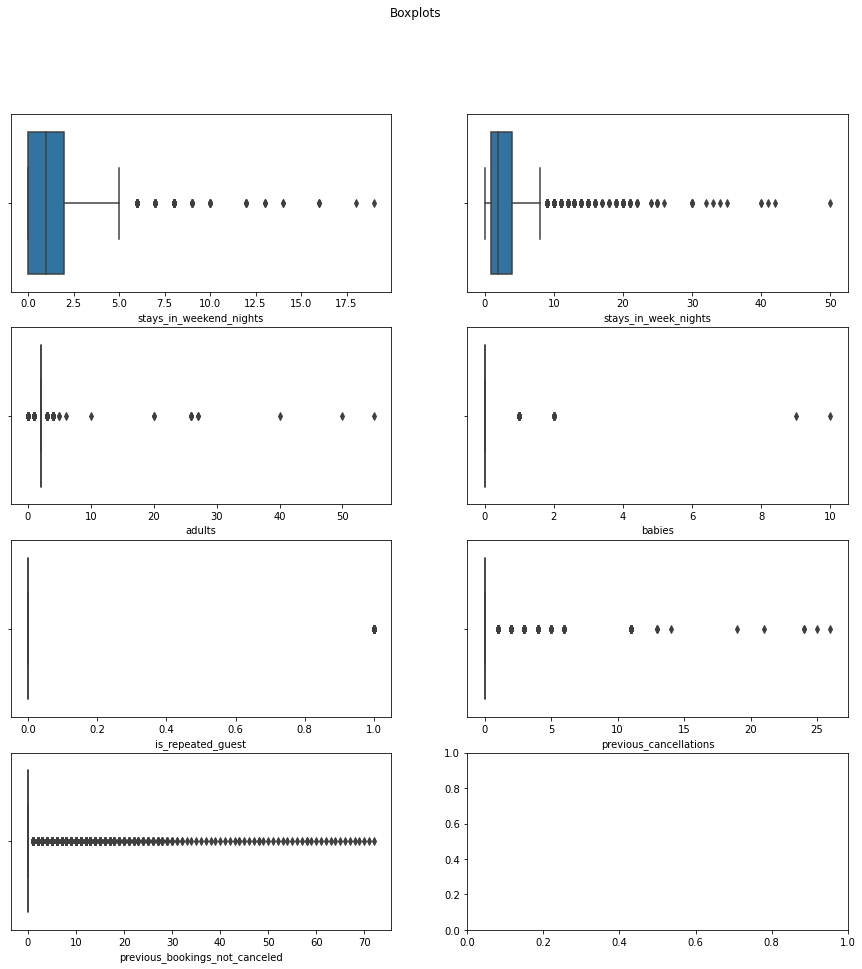

In [ ]:
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(hotel_df1['stays_in_weekend_nights'], ax=ax1)
sns.boxplot(hotel_df1['stays_in_week_nights'], ax=ax2)
sns.boxplot(hotel_df1['adults'], ax=ax3)
sns.boxplot(hotel_df1['babies'], ax=ax4)
sns.boxplot(hotel_df1['is_repeated_guest'], ax=ax5)
sns.boxplot(hotel_df1['previous_cancellations'], ax=ax6)
sns.boxplot(hotel_df1['previous_bookings_not_canceled'], ax=ax7)
plt.show()

In [ ]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = hotel_df1.quantile(0.25)
Q3 = hotel_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                        1.0
arrival_date_day_of_month         15.0
stays_in_weekend_nights            2.0
stays_in_week_nights               3.0
adults                             0.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
required_car_parking_spaces        0.0
total_of_special_requests          1.0
dtype: float64


In [ ]:
# We then get the outliers as follows:
# True means presence of outliers

(hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))

,adults,arrival_date_day_of_month,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119386,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# We then filter out outliers and remain with valid values as follows

df_clean = hotel_df1[~((hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(43962, 21)

**observation**: clean dataset has 43962 records and 21 variables.

In [ ]:
#converting the data to the correct datatype- float
#
df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests" ]] = df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests"]].astype(float)
#

#converting categorical variables to the correct datatype-category
#
df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status" ]] = df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status"]].astype('category')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           43962 non-null  category
 1   is_canceled                     43962 non-null  float64 
 2   arrival_date_month              43962 non-null  category
 3   arrival_date_day_of_month       43962 non-null  float64 
 4   stays_in_weekend_nights         43962 non-null  float64 
 5   stays_in_week_nights            43962 non-null  int64   
 6   adults                          43962 non-null  float64 
 7   children                        43962 non-null  float64 
 8   babies                          43962 non-null  int64   
 9   meal                            43962 non-null  category
 10  country                         43962 non-null  category
 11  is_repeated_guest               43962 non-null  int64   
 12  previous_cancella

##6. Exploratory Data Analysis

## 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [ ]:
# preview of our dataset
#
df_clean.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0.0,July,1.0,0.0,0,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,GBR,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Check-Out
6,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
7,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,FB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,1.0,Check-Out
8,Resort Hotel,1.0,July,1.0,0.0,3,2.0,0.0,0,BB,PRT,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Canceled


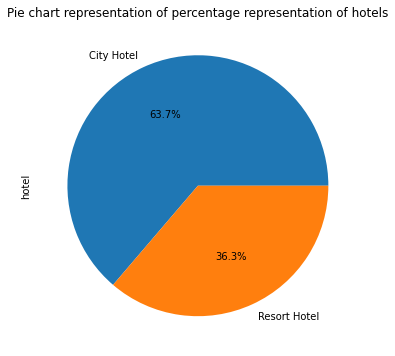

In [ ]:
#univariate analysis: hotel variable piechart
#
#add colors
colors = ('.00', '.25')
plt.figure(figsize = (6, 6))
df_clean.hotel.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.title('Pie chart representation of percentage representation of hotels') 
plt.show()

**observation**: city hotel registered a higher reservation of 63.7%

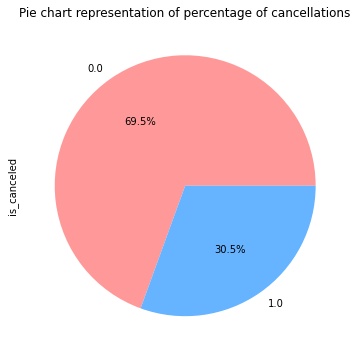

In [ ]:
#univariate analysis: is cancelled variable piechart
#
colors = ['#ff9999','#66b3ff']

plt.figure(figsize = (6, 6))
df_clean.is_canceled.value_counts().plot(kind = 'pie', colors=colors, autopct = '%0.1f%%')
plt.title('Pie chart representation of percentage of cancellations') 
plt.show()

#0=> not cancelled
#1=> cancelled

**observation**: only 31% of reversation was cancelled.

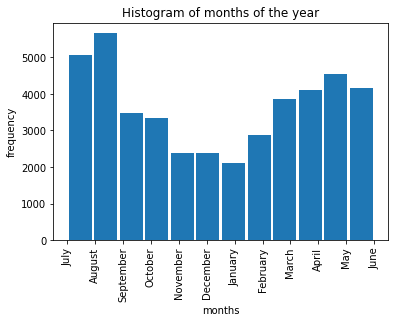

In [ ]:
# univariate analysis: month of arrival variable histogram
#
plt.hist(df_clean['arrival_date_month'], bins=12, histtype='bar', rwidth=0.9)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

**observation**: The most popular months of travel were between May and August with the peak being recorded at August.

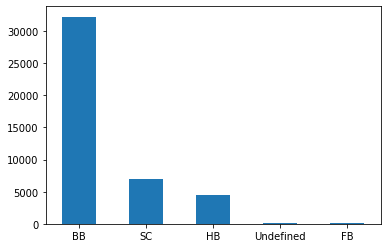

In [ ]:
# univariate analysis: meal variable bar graph
df_clean.meal.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: many guests went for bed and breakfast option.

In [ ]:
# univariate analysis: month of arrival frequency count
# 
df_clean.country.value_counts(ascending=False) 

PRT    11009
GBR     6035
FRA     5082
ESP     3490
DEU     3203
       ...  
CYM        1
NPL        1
JAM        1
PYF        1
ABW        1
Name: country, Length: 163, dtype: int64

**observation**: Most of the hotel guests came from Portugal and Great Britain.

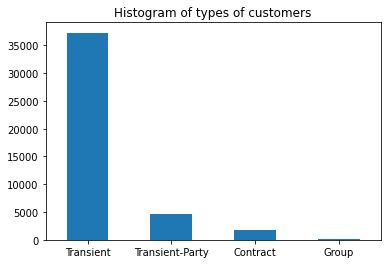

In [ ]:
# univariate analysis: customer type variable bar graph
df_clean.customer_type.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Histogram of types of customers') 

plt.show()

**observation**:The most frequent type of guest was the transient.

**observation**: Most popular arrival dates for customers is 17th and  2nd early of the month mostly because that's when people get their salaries

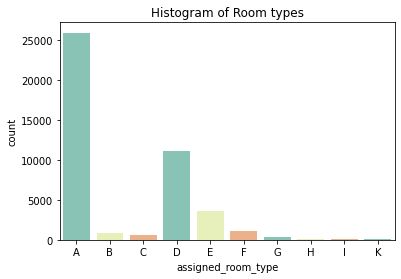

In [ ]:
# univariate analysis: room type variable bar graph
#df_clean.assigned_room_type.value_counts().plot(kind = 'bar', rot = 0)
import seaborn as sns
sns.countplot(x = df_clean['assigned_room_type'],palette= ["#7fcdbb","#edf8b1","#FAAE7B"]);
plt.title('Histogram of Room types') 
plt.show()

**observation**: most of the clients went for romm type A

## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

# Bivariate Analysis 

### Bar Charts to show the relationship between booking cancellation status and other variables

In [ ]:
df_clean['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

0.0    30532
1.0    13430
Name: is_canceled, dtype: int64

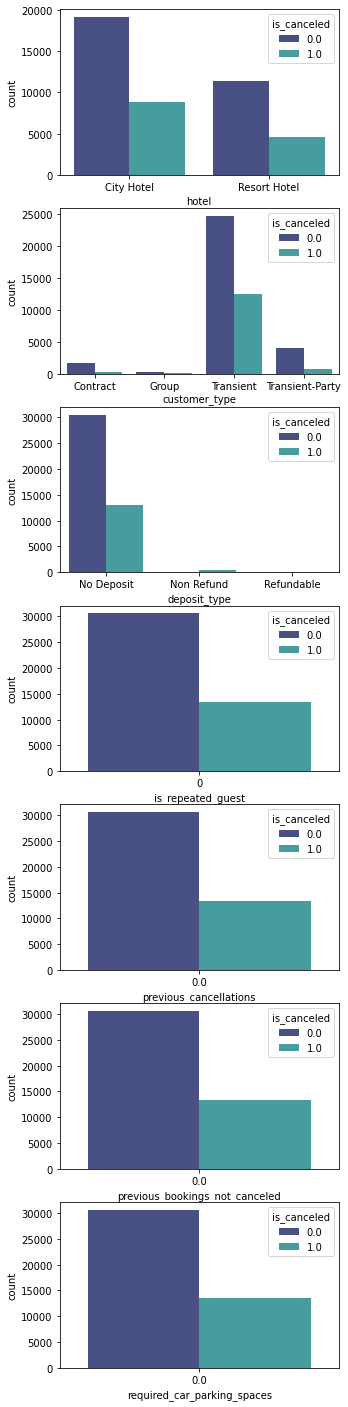

In [ ]:
#plotting the target variable against other features.
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

f, axes = plt.subplots(7, 1, figsize=[5, 25])

sns.countplot('hotel', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[6])

In [ ]:
df_clean.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

Text(0.5, 1.0, 'Total special requests based on  deposit types')

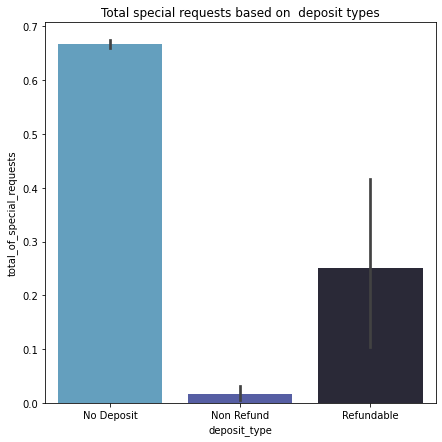

In [ ]:
#Distribution of total_of_special_requests and Deposit Type¶

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['deposit_type'], y=df_clean['total_of_special_requests'], palette=sns.color_palette("icefire"))
plt.title('Total special requests based on  deposit types')


Text(0.5, 1.0, 'Total special requests based on   cancellation')

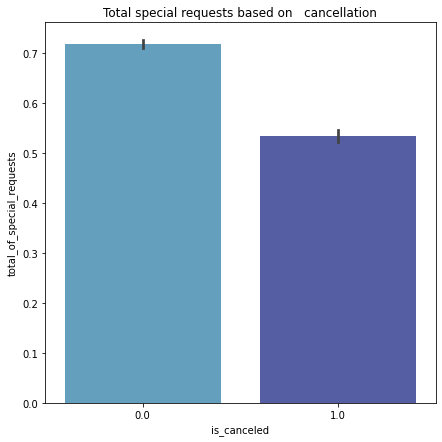

In [ ]:
#Distribution of total_of_special_requests and  cancellation

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['is_canceled'], y=df_clean['total_of_special_requests'], palette=sns.color_palette("icefire"))
plt.title('Total special requests based on   cancellation')




[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

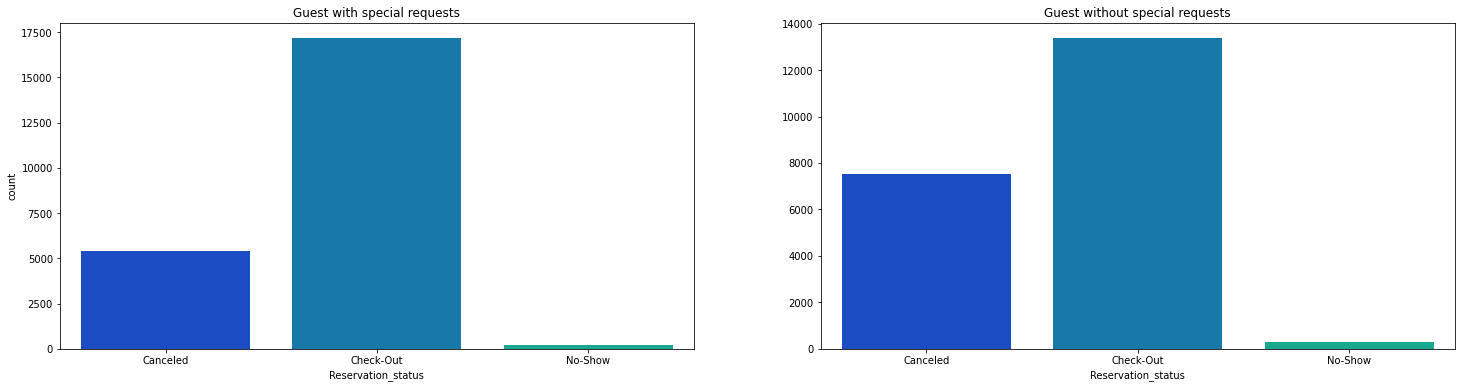

In [ ]:
# Special and non Special Request of the guest
fig, ax = plt.subplots(1, 2, figsize=[25, 6])

special = df_clean[df_clean.total_of_special_requests != 0]
non_special = df_clean[df_clean.total_of_special_requests == 0]
special

# Plots
spec = sns.countplot(special.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

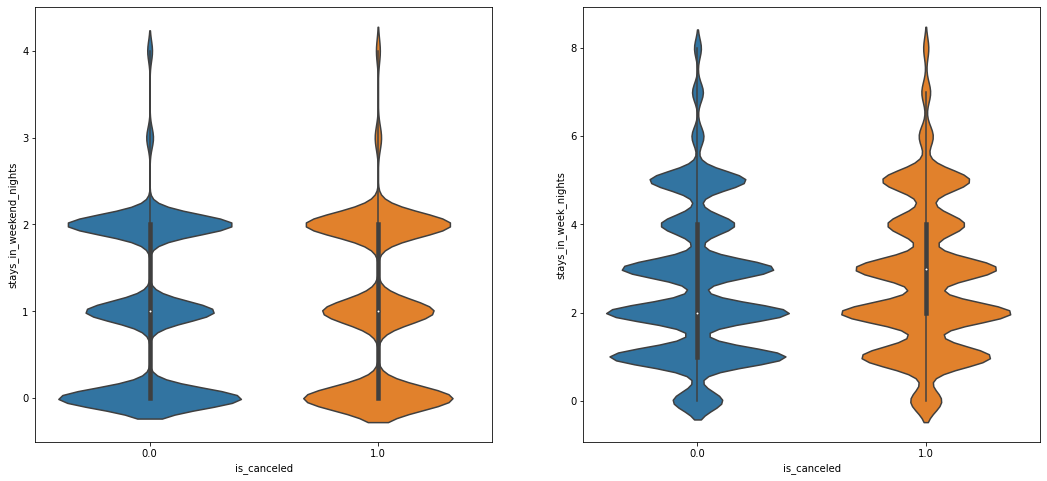

In [ ]:
#Stays in weekend Nights and Week Nights for Cancelled and non cancelled bookings

fig, ax = plt.subplots(1, 2, figsize=[18, 8])

sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_weekend_nights"], ax = ax[0] )
sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_week_nights"], ax = ax[1] )

In [ ]:
#sns.pairplot(df_clean,kind="scatter", diag_kind="kde", hue="is_canceled")

In [ ]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


In [ ]:
df_clean2=df_clean.copy()


In [ ]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_clean['hotel'] = en.fit_transform(df_clean['hotel'])
df_clean['arrival_date_month'] = en.fit_transform(df_clean['arrival_date_month'])
df_clean['country'] = en.fit_transform(df_clean['country'])
df_clean['meal'] = en.fit_transform(df_clean['meal'])
df_clean['reserved_room_type'] = en.fit_transform(df_clean['reserved_room_type'])
df_clean['assigned_room_type'] = en.fit_transform(df_clean['assigned_room_type'])
df_clean['deposit_type'] = en.fit_transform(df_clean['deposit_type'])
df_clean['customer_type'] = en.fit_transform(df_clean['customer_type'])
df_clean['reservation_status'] = en.fit_transform(df_clean['reservation_status'])
df_clean

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0.0,5,1.0,0.0,0,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
4,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,1.0,1
6,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
7,1,0.0,5,1.0,0.0,2,2.0,0.0,0,1,121,0,0.0,0.0,2,2,0,2,0.0,1.0,1
8,1,1.0,5,1.0,0.0,3,2.0,0.0,0,0,121,0,0.0,0.0,0,0,0,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0.0,1,31.0,2.0,4,2.0,0.0,0,0,38,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119384,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,2.0,1
119385,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119388,0,0.0,1,31.0,2.0,5,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [ ]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [ ]:
# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)#

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.9889684976686001
Baseline Model F1 Score: 0.9819131083348871


In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

#Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True False False  True False False False  True  True False False
 False  True  True  True False False  True  True]
Feature Ranking: [ 1  1  3  4  1 10  9  7  1  1  8  6  5  1  1  1  2 11  1  1]


In [ ]:
X.info()#0,1,4,8,9,13,14,15,18,19

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43962 non-null  int64  
 1   arrival_date_month              43962 non-null  int64  
 2   arrival_date_day_of_month       43962 non-null  float64
 3   stays_in_weekend_nights         43962 non-null  float64
 4   stays_in_week_nights            43962 non-null  int64  
 5   adults                          43962 non-null  float64
 6   children                        43962 non-null  float64
 7   babies                          43962 non-null  int64  
 8   meal                            43962 non-null  int64  
 9   country                         43962 non-null  int64  
 10  is_repeated_guest               43962 non-null  int64  
 11  previous_cancellations          43962 non-null  float64
 12  previous_bookings_not_canceled 

In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
0,hotel,1
15,deposit_type,1
14,assigned_room_type,1
13,reserved_room_type,1
18,total_of_special_requests,1
8,meal,1
9,country,1
4,stays_in_week_nights,1
1,arrival_date_month,1
19,reservation_status,1


In [ ]:
df2 = df_clean[['hotel', 'deposit_type','assigned_room_type','reserved_room_type','total_of_special_requests','meal','country','stays_in_week_nights','arrival_date_month','reservation_status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      43962 non-null  int64  
 1   deposit_type               43962 non-null  int64  
 2   assigned_room_type         43962 non-null  int64  
 3   reserved_room_type         43962 non-null  int64  
 4   total_of_special_requests  43962 non-null  float64
 5   meal                       43962 non-null  int64  
 6   country                    43962 non-null  int64  
 7   stays_in_week_nights       43962 non-null  int64  
 8   arrival_date_month         43962 non-null  int64  
 9   reservation_status         43962 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [ ]:
df2.columns

Index(['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status'],
      dtype='object')

In [ ]:
df_clean2=df_clean2[['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status']]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      43962 non-null  category
 1   deposit_type               43962 non-null  category
 2   assigned_room_type         43962 non-null  category
 3   reserved_room_type         43962 non-null  category
 4   total_of_special_requests  43962 non-null  float64 
 5   meal                       43962 non-null  category
 6   country                    43962 non-null  category
 7   stays_in_week_nights       43962 non-null  int64   
 8   arrival_date_month         43962 non-null  category
 9   reservation_status         43962 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 2.6 MB


In [ ]:
df_clean2_copy = df_clean2.copy()

so we are going the following algorithms:


1. Logistic Reg
2. Random Forest
2. Gradient Boosted Trees
4. Naive Bayes Classifier
5. Neural Networks
6. k-NN classifier
7. SVM




k-NN classifier

In [ ]:
#creating dummies for the categorical columns
#columns = df_clean2.columns
#df_clean2 = pd.get_dummies(df_clean2, columns=columns, drop_first=True)
#df_clean2.head()

In [ ]:
##Defining our dependent and Independent Variables

#y = df_clean[['is_canceled']]
#X = df_clean2

In [ ]:
# Implementing the Solution
#import numpy as np
#from sklearn import metrics
#from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
#Scaling the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


In [ ]:
# Using the 80-20 to train and test the model.
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#model1 = KNeighborsClassifier()

In [ ]:
#Training the model.
#model = model1.fit(X_train, y_train)

In [ ]:
#Predict test data set.
#y_pred = model.predict(X_test)

In [ ]:
#Checking performance our model with confusion matrix.
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print('\n')

In [ ]:
#Checking performance our model with classification report.
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

In [ ]:

#Checking performance our model with ROC Score.
#from sklearn.metrics import roc_auc_score
#print('\n')
#roc_auc_score(y_test, y_pred)*100

The accuracy of the model is 87.76%. Nevertheless we do some hyperparameter tuning to see if we can make any improvements.

# Hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import GridSearchCV
#leaf_size = list(range(1,60))
#n_neighbors = list(range(1,40))
#p=[1,2,3]


In [ ]:
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#model_2 = KNeighborsClassifier()
#Use GridSearch
#clf = GridSearchCV(model_2, hyperparameters, cv=10)

In [ ]:
#Fitting the model
#best_model = clf.fit(X,y)

In [ ]:
#Printing the best hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Challenging the solution

In [ ]:
#Fitting the model with the tuned parameters to see if there is any improvement
#knn = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
#model2 = knn.fit(X_train, y_train)

In [ ]:
#Making predictions.
#y2_pred = model.predict(X_test)

In [ ]:
#Checking performance our model with confusion matrix.
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y2_pred))
#print('\n')

In [ ]:
#Checking performance our model with classification report.
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y2_pred))

In [ ]:
#Checking performance our model with ROC Score.
#from sklearn.metrics import roc_auc_score
#print('\n')
#roc_auc_score(y_test, y2_pred)

After the hyperparameter tuning,the ROC has increased to 76.70%

60-40

In [ ]:
# Train using 60% of the data.
#from sklearn.model_selection import train_test_split
#X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)
#X2_train.shape, y2_train.shape

In [ ]:
#knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
#model2 = knn1.fit(X2_train, y2_train)

#Predict test data set.
#y3_pred = model2.predict(X2_test)

In [ ]:
#Checking performance our model with confusion matrix.
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y2_test, y3_pred))
#print('\n')

In [ ]:
#Checking performance our model with ROC Score.
#from sklearn.metrics import roc_auc_score
#print('\n')
#roc_auc_score(y2_test, y3_pred)

The ROC is 76.30%

50-50 Ratio

In [ ]:
# Train using 50% of the data.
#from sklearn.model_selection import train_test_split
#X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.5, random_state=0)
#X1_train.shape, y1_train.shape

In [ ]:
#knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
#model3 = knn1.fit(X1_train, y1_train)

#Predict test data set.
#y4_pred = model.predict(X1_test)

In [ ]:
#Checking performance our model with confusion matrix.
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y1_test, y4_pred))
#print('\n')

In [ ]:
#Checking performance our model with classification report.
#from sklearn.metrics import classification_report
#print(classification_report(y1_test, y4_pred))

In [ ]:
#Checking performance our model with ROC Score.
#from sklearn.metrics import roc_auc_score
#print('\n')
#roc_auc_score(y1_test, y4_pred)

The ROC is at 81.01%

70-30 Ratio

In [ ]:
# Training the model using 70% of the data.
#from sklearn.model_selection import train_test_split
#X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X3_train.shape, y3_train.shape

In [ ]:
#knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
#model4 = knn2.fit(X3_train, y3_train)

In [ ]:
#Makig Predictions
#y5_pred = model.predict(X3_test)

In [ ]:
#Checking performance our model with confusion matrix.
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y3_test, y5_pred))
#print('\n')

In [ ]:
#Checking performance our model with classification report.
#from sklearn.metrics import classification_report
#print(classification_report(y3_test, y5_pred))

In [ ]:
#Checking performance our model with ROC Score.
#from sklearn.metrics import roc_auc_score
#print('\n')
#roc_auc_score(y3_test, y5_pred)

The ROC Value is at 80.51%

Random Forest

In [ ]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#making prediction
y_pred = forest.predict(X_test)

#Comparing Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8788,0.0,0.0
8789,1.0,1.0
8790,0.0,0.0
8791,1.0,1.0


In [ ]:
#accuracy check using AUC-ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn import metrics

from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y_test, y_pred)

0.9810648668916385

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Visualization of the basic model.

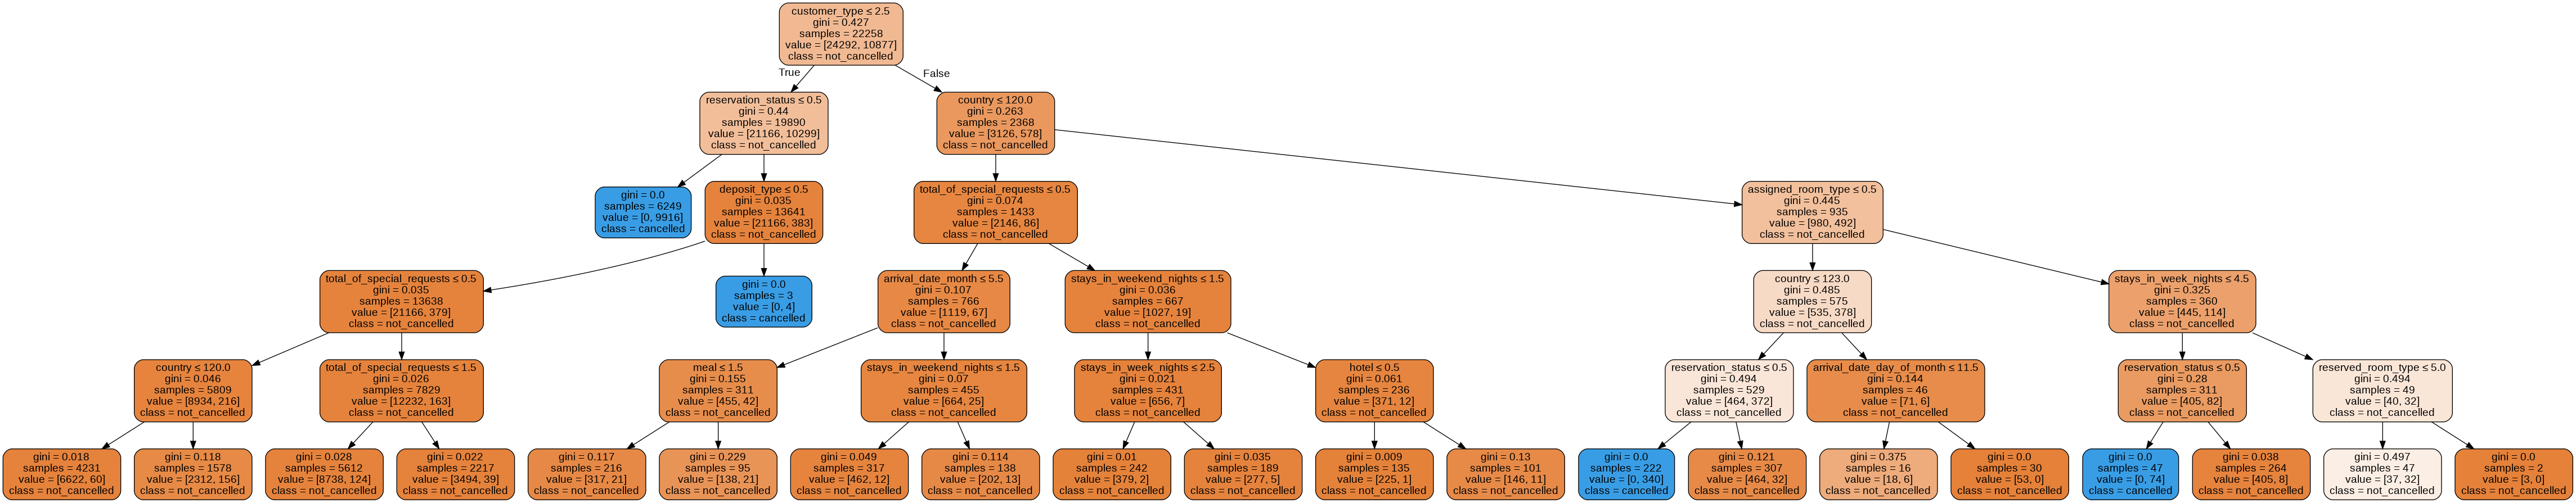

In [ ]:
test_features = df_clean.columns.to_list()
test_features.remove('is_canceled')

#Visualizing the Random forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['not_cancelled', 'cancelled'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hotel_forest.png')
Image(graph.create_png())


The selected decision tree is based on customer type, it splits the dataset on values 2.5 and is split to [24292, 10877]. This means that on our current training data 24,292 reservations were not cancelled while 10,877 were cancelled.Hence the root node has a class of not cancelled.
The left children of the root node, the node has a class of not cancelled that indicates that the left side of our random forest has a bias towards reservations that were not cancelled.


Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
print(feature_importances) 

#sort the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('hotel', 0.0), ('arrival_date_month', 0.0), ('arrival_date_day_of_month', 0.0), ('stays_in_weekend_nights', 0.0), ('stays_in_week_nights', 0.0), ('adults', 0.0), ('children', 0.0), ('babies', 0.0), ('meal', 0.0), ('country', 0.01), ('is_repeated_guest', 0.0), ('previous_cancellations', 0.0), ('previous_bookings_not_canceled', 0.0), ('reserved_room_type', 0.0), ('assigned_room_type', 0.0), ('deposit_type', 0.0), ('customer_type', 0.01), ('required_car_parking_spaces', 0.0), ('total_of_special_requests', 0.0), ('reservation_status', 0.97)]
Variable: reservation_status   Importance: 0.97
Variable: country              Importance: 0.01
Variable: customer_type        Importance: 0.01
Variable: hotel                Importance: 0.0
Variable: arrival_date_month   Importance: 0.0
Variable: arrival_date_day_of_month Importance: 0.0
Variable: stays_in_weekend_nights Importance: 0.0
Variable: stays_in_week_nights Importance: 0.0
Variable: adults               Importance: 0.0
Variable: children  

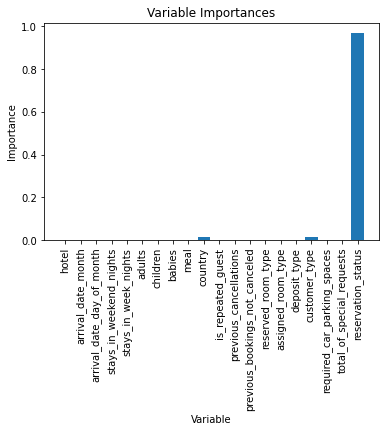

In [ ]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Tuning the random forest

In [ ]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#making prediction
y_pred = forest.predict(X_test)

#Comparing Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8788,0.0,0.0
8789,1.0,1.0
8790,0.0,0.0
8791,1.0,1.0


In [ ]:
#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 300, 500],
    'max_depth': [5,15,4,10],
    #'min_samples_split': [8, 10, 12]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print('The best parameters ',grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


The best parameters  {'max_depth': 10, 'n_estimators': 500}


In [ ]:
grid_search.best_score_

0.9999715658676674

In [ ]:
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#Trying with the best parameters set manually
rforest = RandomForestClassifier(n_estimators=100, max_depth=15, criterion='gini')
rforest = rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)


Accuracy  1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


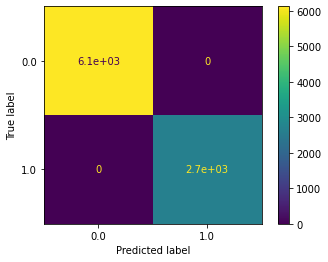

In [ ]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#assessing prediction errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rforest,X_test,y_test)

In [ ]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0

test_features = df_clean.columns.to_list()
test_features.remove('is_canceled')

#Visualizing the Random forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rforest.estimators_[50,0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features, class_names=['not_cancelled', 'cancelled'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hotel_forest2.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
print(feature_importances) 

#sort the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('hotel', 0.0), ('arrival_date_month', 0.0), ('arrival_date_day_of_month', 0.0), ('stays_in_weekend_nights', 0.0), ('stays_in_week_nights', 0.0), ('adults', 0.0), ('children', 0.0), ('babies', 0.0), ('meal', 0.0), ('country', 0.01), ('is_repeated_guest', 0.0), ('previous_cancellations', 0.0), ('previous_bookings_not_canceled', 0.0), ('reserved_room_type', 0.0), ('assigned_room_type', 0.0), ('deposit_type', 0.0), ('customer_type', 0.01), ('required_car_parking_spaces', 0.0), ('total_of_special_requests', 0.0), ('reservation_status', 0.97)]
Variable: reservation_status   Importance: 0.97
Variable: country              Importance: 0.01
Variable: customer_type        Importance: 0.01
Variable: hotel                Importance: 0.0
Variable: arrival_date_month   Importance: 0.0
Variable: arrival_date_day_of_month Importance: 0.0
Variable: stays_in_weekend_nights Importance: 0.0
Variable: stays_in_week_nights Importance: 0.0
Variable: adults               Importance: 0.0
Variable: children  

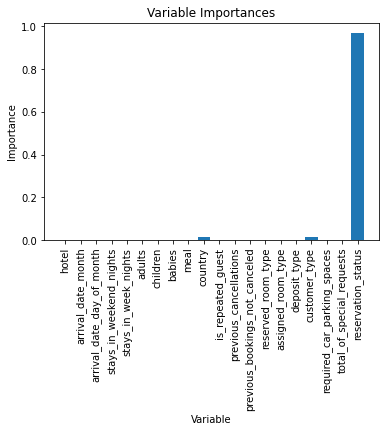

In [ ]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

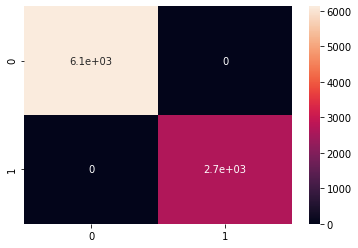

In [ ]:
#Checking the confusion matrix
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

In [ ]:
#Classification report
print("Classification Report :")
print(metrics.classification_report(y_test,y_pred))

Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6126
         1.0       1.00      1.00      1.00      2667

    accuracy                           1.00      8793
   macro avg       1.00      1.00      1.00      8793
weighted avg       1.00      1.00      1.00      8793



In [1059]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0

Gradient Boosting 
-Light GBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following :

Faster training speed and higher efficiency.

Lower memory usage.

Better accuracy.

Support of parallel and GPU learning.

Capable of handling large-scale data.

In [1060]:
#Libraries necessary for GBM classifier
import lightgbm as lgb 
from lightgbm import LGBMClassifier 
from sklearn.metrics import classification_report

X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating an object for model and fitting it on training data set  
model = LGBMClassifier() 
model.fit(X_train, y_train)

# Predicting the Target variable 
pred = model.predict(X_test) 
print(pred) 

accuracy = model.score(X_test, y_test) 
print(accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test,pred))

[0. 0. 0. ... 0. 1. 0.]
1.0
[[6126    0]
 [   0 2667]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6126
         1.0       1.00      1.00      1.00      2667

    accuracy                           1.00      8793
   macro avg       1.00      1.00      1.00      8793
weighted avg       1.00      1.00      1.00      8793



Tuned LGBM

In [1061]:
#Tuning GBM model
from sklearn.model_selection import GridSearchCV

lgbm = lgb.LGBMClassifier()
params = {'max_depth':[25, 50, 75],
          'learning_rate':[0.01, 0.05, 0.1],
          'num_leaves': [300, 900, 1200],
          'n_estimators': [ 200]
          }
#create an object of grid search
grid_search_lgbm = GridSearchCV(lgbm, n_jobs=-1, param_grid=params, cv=3, verbose =5)

#fit lgbm
grid_search_lgbm = grid_search_lgbm.fit(X_train, y_train)
grid_search_lgbm.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   36.0s finished


{'learning_rate': 0.01,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [1062]:
#best params
grid_search_lgbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [1063]:
#predicting and accuracy check
y_pred = grid_search_lgbm.predict(X_test)

#Comparing Actual with predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8788,0.0,0.0
8789,1.0,1.0
8790,0.0,0.0
8791,1.0,1.0


Accuracy  1.0


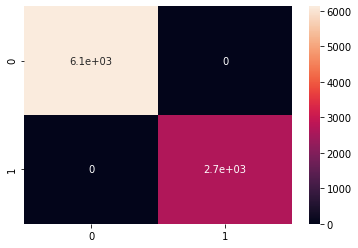

In [1064]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#Checking the confusion matrix
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

In [1068]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0

XGBoost

In [1065]:
import xgboost as xgb

X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating an object for model and fitting it on training data 
model = xgb.XGBClassifier()
param_dist = {'max_depth': [10, 30, 50],
              'min_child_weight' : [1,3,6],
               'n_estimators': [100, 150, 200],
               'learning_rate': [0.05, 0.1, 0.16] }

grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1066]:
#training a tuned model
model = xgb.XGBClassifier(max_depth=10 , min_child_weight=1, n_estimators=100 ,n_jobs=1 , verbose=1, learning_rate=0.05)
model.fit(X_train, y_train)

#predicting and accuracy check
y_pred = model.predict(X_test)

#Comparing Actual with predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame)

#predicting probabilities of the test data
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
#Keep the probabilities of the positive class
probs = probs[:, 1]

#AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)


      Actual  Predicted
0        0.0        0.0
1        0.0        0.0
2        0.0        0.0
3        0.0        0.0
4        0.0        0.0
...      ...        ...
8788     0.0        0.0
8789     1.0        1.0
8790     0.0        0.0
8791     1.0        1.0
8792     0.0        0.0

[8793 rows x 2 columns]
AUC: 1.00


Accuracy  1.0


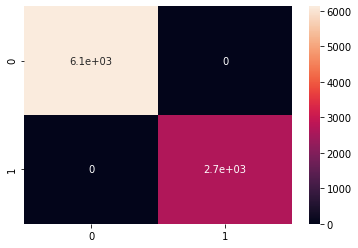

In [1067]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#Checking the confusion matrix
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

In [1069]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0